 # Classifying seizures using spectral contrasting

 Author: Ali Zaidi

 ### BRIEF INTRODUCTION

 Our objective is to train a classifier to detect seizures from EEG data.
 We are using a data from the Temple University dataset.
 The objective of this analysis is to demonstrate the usefulness of smart
 feature engineering. The methods have already been defined in src/data_handling.py.

In [10]:
# Import all dependencies
from sklearn import svm
import src.data_loader as dl
import time
import numpy as np
from itertools import compress
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.neural_network import MLPClassifier
import multiprocessing
import scipy.stats
from sklearn.manifold import TSNE
import sys
import mpld3

# Set some params
# mpld3.enable_notebook()

In [11]:
# Import the data handling scripts and initialize the object.
import src.data_handling
dh = src.data_handling.data_handling()
dh.load_data()


Loading dataset...
A summary of valid labels is below: 
Format: [Label name, label index, Label count]
['null', 0, 879]
['bckg', 6, 6864]
['gnsz', 9, 67]
['cpsz', 11, 184]
['tcsz', 15, 6]


 ## Understanding the data

 The data has beenn divided into the following objects:

 data:     timeseries data from 6 EEG channels

  labels:   a binary array identifying the epoch label

In [12]:
# The dataset is arranged as an array with shape channels x timeseries x epochs.
# Let's have a look at the shape of our data object. 
print(dh.data.shape)


(6, 500, 8000)


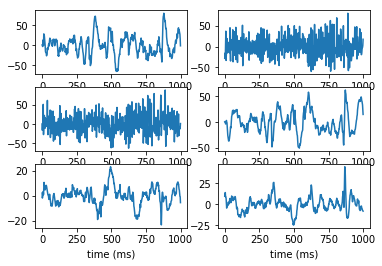

In [13]:
# There are 8000 epochs of 6 channels sampled at 500 Hz.
# Let's plot the first epoch:
plot, axes = plt.subplots(3, 2)

for ax, ch in zip(axes.ravel(), range(6)):
    plt.subplot(ax)
    plt.plot(np.linspace(0, 999, num=500), dh.data[ch, :, 0])
    plt.xlabel('time (ms)')


In [14]:
print(dh.get_label_string(dh.labels[0]))


['bckg']
